In [26]:
import pandas as pd


In [27]:
path='/content/drive/MyDrive/ML projects/decision tree/drug200.csv'

In [28]:
data = pd.read_csv(path)

In [29]:
data.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC


In [30]:
print(data['Sex'].unique())
print(data['BP'].unique())
print(data['Cholesterol'].unique())
print(data['Drug'].unique())

['F' 'M']
['HIGH' 'LOW' 'NORMAL']
['HIGH' 'NORMAL']
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [31]:
data.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [32]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [33]:
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])
data['Drug'] = le.fit_transform(data['Drug'])

In [34]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
feature = data.iloc[:,0:4]
label = data.iloc[:,5]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
trainF,testF,trainL,testL = train_test_split(feature,label,test_size=.1,random_state=3)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [40]:
model.fit(trainF,trainL)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
print(model.max_depth)

4


In [42]:
pred = model.predict(testF)

In [43]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

In [44]:
cm = confusion_matrix(testL,pred)

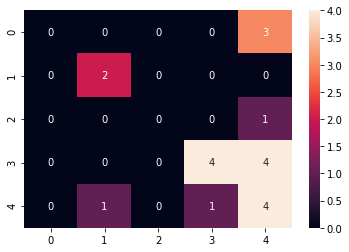

In [45]:
import seaborn as sns
sns.heatmap(cm,fmt='d',annot=True)

In [46]:
model.classes_

array([0, 1, 2, 3, 4])

In [47]:
print(classification_report(testL,pred,target_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY']))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         3
       drugB       0.67      1.00      0.80         2
       drugC       0.00      0.00      0.00         1
       drugX       0.80      0.50      0.62         8
       drugY       0.33      0.67      0.44         6

    accuracy                           0.50        20
   macro avg       0.36      0.43      0.37        20
weighted avg       0.49      0.50      0.46        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
from sklearn import metrics

In [49]:
print(metrics.accuracy_score(testL,pred))

0.5
